In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns 
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['lower-back-pain-symptoms-dataset']


In [2]:
data = pd.read_csv("../input/lower-back-pain-symptoms-dataset/Dataset_spine.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
#Temoving the last column
data.drop("Unnamed: 13",axis=1,inplace=True)

In [6]:
#labelling the result column
data["Class_att"] = [1 if i =="Abnormal" else 0  for i in data.Class_att]

In [7]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


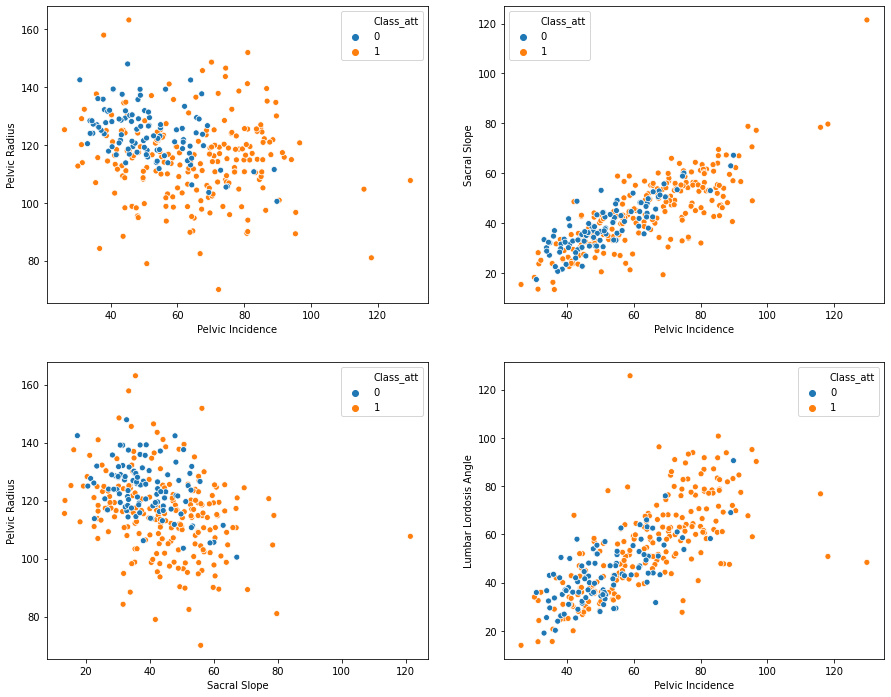

In [8]:
#visualising the dataset
plt.figure(figsize = (15,12))
plt.subplot(221)
sns.scatterplot(x=data.Col1,y=data.Col5,hue=data.Class_att)
plt.xlabel("Pelvic Incidence")
plt.ylabel("Pelvic Radius")

plt.subplot(222)
sns.scatterplot(x = data.Col1,y = data.Col4,hue=data.Class_att)
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")

plt.subplot(223)
sns.scatterplot(x = data.Col4,y = data.Col5,hue=data.Class_att)
plt.xlabel("Sacral Slope")
plt.ylabel("Pelvic Radius")

plt.subplot(224)
sns.scatterplot(x = data.Col1,y = data.Col3,hue=data.Class_att)
plt.xlabel("Pelvic Incidence")
plt.ylabel("Lumbar Lordosis Angle")

plt.show()

In [9]:
#we cant find any specific combination to rely upon


In [10]:
#Dependent and independent vector
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Data Preprocessing

In [11]:

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.25,random_state=0)

Fitting the model



In [13]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[20,  4],
       [ 9, 45]])

In [17]:
correct_prediction = cm[0][0]+cm[1][1]
wrong_prediction = cm[0][1]+cm[1][0]
total = correct_prediction + wrong_prediction

In [18]:
accuracy = (correct_prediction/total)*100

In [19]:
accuracy

83.33333333333334

In [20]:
accuracy

83.33333333333334